In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader


from sklearn.model_selection import train_test_split

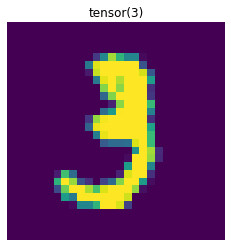

In [2]:
from tensorflow.keras.datasets import mnist


(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

# Convert to float32.

features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
num_features=784

features_train, features_test = features_train.reshape([-1, num_features]), features_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].

features_train, features_test = features_train / 255., features_test / 255

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. 
#Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(featuresTrain[10].reshape(28,28))
plt.axis("off")
plt.title(str(targetsTrain[10]))
plt.savefig('graph.png')
plt.show()



In [3]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.hidden=nn.Linear(input_dim,hidden_dim)
        self.sigmoid=nn.Sigmoid()
        self.output=nn.Linear(hidden_dim,output_dim)
        self.softmax=nn.Softmax()
        
    def forward(self, x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        
        return x
        
# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)
# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [4]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
num_epochs=100
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

<ipython-input-3-94f7303e6a66>:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Iteration: 500  Loss: 2.3002731800079346  Accuracy: 11.350000381469727 %
Iteration: 1000  Loss: 2.2975845336914062  Accuracy: 11.350000381469727 %
Iteration: 1500  Loss: 2.2837319374084473  Accuracy: 11.350000381469727 %
Iteration: 2000  Loss: 2.2820732593536377  Accuracy: 14.359999656677246 %
Iteration: 2500  Loss: 2.2356324195861816  Accuracy: 21.020000457763672 %
Iteration: 3000  Loss: 2.2493574619293213  Accuracy: 21.100000381469727 %
Iteration: 3500  Loss: 2.2092037200927734  Accuracy: 24.34000015258789 %
Iteration: 4000  Loss: 2.176701307296753  Accuracy: 33.470001220703125 %
Iteration: 4500  Loss: 2.1432721614837646  Accuracy: 40.790000915527344 %
Iteration: 5000  Loss: 2.1224818229675293  Accuracy: 46.400001525878906 %
Iteration: 5500  Loss: 2.040144920349121  Accuracy: 48.060001373291016 %
Iteration: 6000  Loss: 2.0852673053741455  Accuracy: 48.619998931884766 %
Iteration: 6500  Loss: 2.053441047668457  Accuracy: 48.90999984741211 %
Iteration: 7000  Loss: 2.0618855953216553  A

Iteration: 56500  Loss: 1.6440842151641846  Accuracy: 76.62999725341797 %
Iteration: 57000  Loss: 1.7031912803649902  Accuracy: 76.63999938964844 %
Iteration: 57500  Loss: 1.7061594724655151  Accuracy: 76.66000366210938 %
Iteration: 58000  Loss: 1.8004881143569946  Accuracy: 76.61000061035156 %
Iteration: 58500  Loss: 1.7535475492477417  Accuracy: 76.66999816894531 %
Iteration: 59000  Loss: 1.7104144096374512  Accuracy: 76.69999694824219 %
Iteration: 59500  Loss: 1.6433926820755005  Accuracy: 76.69000244140625 %
Iteration: 60000  Loss: 1.7020049095153809  Accuracy: 76.68000030517578 %


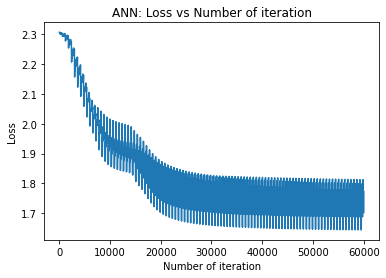

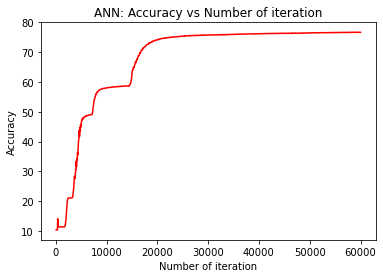

In [5]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

In [3]:
from tensorflow.keras.datasets import mnist


(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

# Convert to float32.

features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)

# Normalize images value from [0, 255] to [0, 1].

features_train, features_test = features_train / 255., features_test / 255

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. 
#Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type

In [6]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

      ######################################################################       
      #### DESIGN LAYERS :
      ### SEQUENCE: CONV1,ACTIVATION1,POOLING1,  CONV2,ACTIVATION2,POOLING2, LINEAR(FC)
        self.conv1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2)
        self.act1=nn.ReLU()
        self.pool1=nn.MaxPool2d(kernel_size=2)
        
        self.conv2=nn.Conv2d(16,32,5,1,2)
        self.act2=nn.ReLU()
        self.pool2=nn.MaxPool2d(kernel_size=2)
        
        self.linear=nn.Linear(32*7*7,10)
        
        
        
    def forward(self,x):
       # COMBINE LAYERS
       ## 1) CONV1
        x=self.conv1(x)
       ## 2) ACTIVATION1
        x=self.act1(x)
       ## 3) POOLING1
        x=self.pool1(x)
       ## 4) CONV2
        x=self.conv2(x)
       ## 5) ACTIVATION2
        x=self.act2(x)
       ## 6) POOLING2
        x=self.pool2(x)
       ## 7) flatten ########## DURING LAB WE JUST FORGOT FOLLOWING FLATTEN LAYER ###############
        x = x.view(x.size(0), -1)

       ## 8) LINEAR(FC)
        x=self.linear(x)
        
        return x
# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [7]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.124538853764534  Accuracy: 96.9800033569336 %
Iteration: 1000  Loss: 0.04829440265893936  Accuracy: 97.83999633789062 %
Iteration: 1500  Loss: 0.050505608320236206  Accuracy: 97.97000122070312 %
Iteration: 2000  Loss: 0.02480495534837246  Accuracy: 98.58999633789062 %


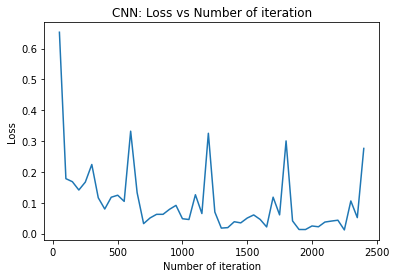

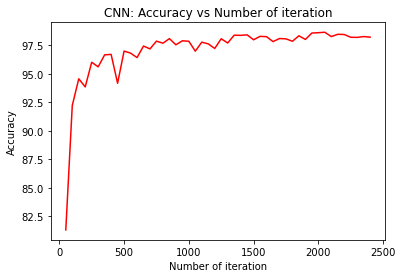

In [8]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

### Try CNN on "Fruit" dataset. Also modify number of layers and observe the performance difference: 

https://www.kaggle.com/moltean/fruits


Or (In a case if you don't have that much dataPack available, download 20 images of apple and 20 images of orange from the internet and work on it with RANDOM state=Rollnumber stratergy, 80-20% training-testing division)







In [56]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import random

In [57]:
warnings.filterwarnings("ignore")

In [58]:
data_dir='dataset'

In [59]:
# Data transforms (data augmentation)
train_tfms = tt.Compose([ 
                         tt.Resize((100,100)),
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 

                         ])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Resize((100,100)),
                         ])

train_dataset = ImageFolder(data_dir + "/train", transform=train_tfms)
val_dataset = ImageFolder(data_dir + "/val", transform=valid_tfms)
test_dataset = ImageFolder(data_dir + "/test", transform=valid_tfms)

In [60]:
dataset_size = len(train_dataset)
test_dataset_size = len(test_dataset)
print(dataset_size)
print(test_dataset_size)

24
8


Total Number of Classe 2
Classes Names: ['apple', 'orange']
torch.Size([3, 100, 100])
torch.Size([100, 100, 3])
Label (numeric): 0
Label (textual): apple


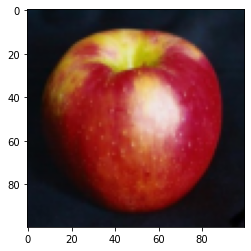

In [61]:
classes = train_dataset.classes
print(f'Total Number of Classe {len(classes)}')
print(f'Classes Names: {classes}')

img, label = train_dataset[random.randint(0,dataset_size)]
print(img.shape)
img=img.permute((1, 2, 0))
print(img.shape)
plt.imshow(img)
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [62]:
train_ds=train_dataset
val_ds=val_dataset

In [74]:
batch_size=2

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)
test_loader = DataLoader(test_dataset, batch_size*2)

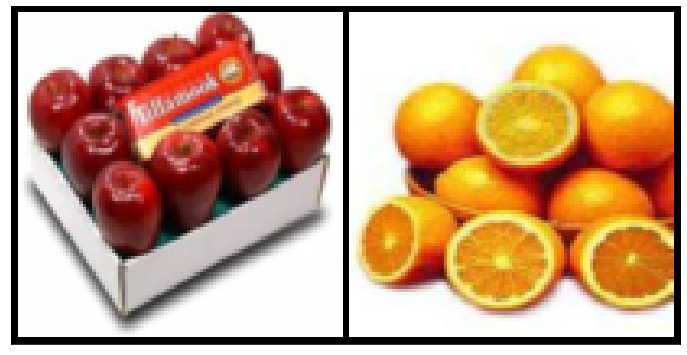

In [75]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=12).permute(1, 2, 0))
        break

show_batch(train_loader)

In [89]:
class FruitCnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 16, kernel_size=2, padding=1), 
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # 16 X 50 X 50

            nn.Conv2d(16, 32, kernel_size=2, stride=1, padding=1), 
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # 32 X 25 X 25

            nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(5, 5), # 64 X 5 X 5

            nn.Flatten(), 
            nn.ReLU(),
            nn.Linear(64*5*5, 2))
        
    def forward(self, xb):
        return self.network(xb)

model = FruitCnnModel()
model

FruitCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): ReLU()
    (11): Linear(in_features=1600, out_features=2, bias=True)
  )
)

In [90]:
# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [93]:
num_epochs = 40
count=0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images)
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        count+=1
        if count%50==0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                test = Variable(images)

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 50  Loss: 0.6949796676635742  Accuracy: 50.0 %
Iteration: 100  Loss: 0.38014280796051025  Accuracy: 50.0 %
Iteration: 150  Loss: 0.20301443338394165  Accuracy: 75.0 %
Iteration: 200  Loss: 0.10105810314416885  Accuracy: 100.0 %
Iteration: 250  Loss: 0.6824202537536621  Accuracy: 50.0 %
Iteration: 300  Loss: 0.11908897757530212  Accuracy: 100.0 %
Iteration: 350  Loss: 1.177495002746582  Accuracy: 50.0 %
Iteration: 400  Loss: 0.2270793467760086  Accuracy: 100.0 %
Iteration: 450  Loss: 0.0005808053538203239  Accuracy: 75.0 %


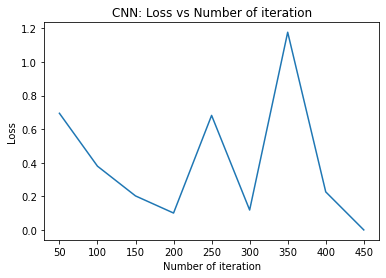

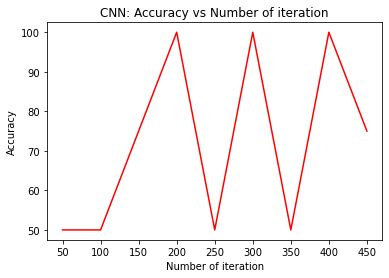

In [94]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [99]:

def predict_image(img, model):
    # Get predictions from model
    yb = model(img.unsqueeze(0))
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_dataset.classes[preds[0].item()]

Label: orange Predicted: orange
status :  True
Label: orange Predicted: orange
status :  True
Label: orange Predicted: orange
status :  True
Label: apple Predicted: apple
status :  True
Label: orange Predicted: orange
status :  True
Label: orange Predicted: orange
status :  True
Label: apple Predicted: orange
status :  False
Label: apple Predicted: orange
status :  False
Label: apple Predicted: apple
status :  True
Label: apple Predicted: orange
status :  False


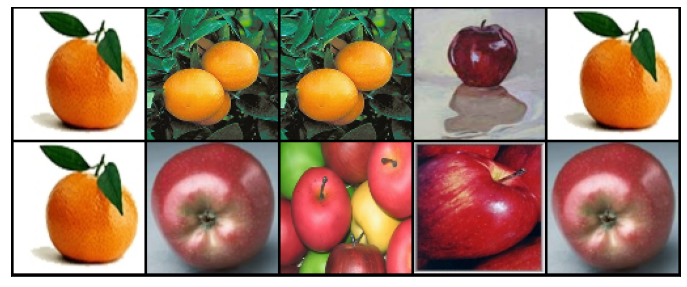

In [101]:
imgs = []
for i in range(10):
    img, label = test_dataset[random.randint(0,len(test_dataset)-1)]
    imgs.append(img)
    right = test_dataset.classes[label]
    pred= predict_image(img, model)
    print('Label:',right , 'Predicted:',pred)
    print('status : ',right==pred)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xticks([]); ax.set_yticks([])
ax.imshow(make_grid(imgs, nrow=5).permute(1, 2, 0))